In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [8]:
df_auto= pd.read_csv("/content/automobile.csv")
df_auto.head()


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [9]:
# get features

X = df_auto.drop('price', axis = 1)
Y = df_auto['price']

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
## Train test Split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X.shape)
print(X_train.shape)
print(X_test.shape)


(201, 28)
(160, 28)
(41, 28)


In [36]:
# Simple Linear Regression
# Predict Car Price using "highway-mpg"

X_train_simple = X_train['highway-mpg'].values.reshape(-1, 1)
X_test_simple = X_test['highway-mpg'].values.reshape(-1, 1)

X_train_simple.shape, X_test_simple.shape

((160, 1), (41, 1))

In [13]:
# Fit simple linear regression

simple_lm = LinearRegression()
simple_lm.fit(X_train_simple, y_train)

LinearRegression()

In [14]:
# y = mx + c
# get prediction

y_hat_simple = simple_lm.predict(X_test_simple)
y_hat_simple[:5]

array([10530.19044542,  7150.17926639, 12220.19603494, 10530.19044542,
       13910.20162445])

In [15]:
# get intercept

simple_lm.intercept_

39260.285467176436

In [16]:
# get slope

simple_lm.coef_.item()

-845.0027947574554

Price = -845.0027 * highway-mpg + 39260.285467176436

In [17]:
X_test_simple[:5]

array([[34],
       [38],
       [32],
       [34],
       [30]])

**Exercise:**

independent features: engine-size, horsepower etc.

**Multiple Linear Regression**

In [18]:
X_train

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,horsepower-binned,diesel,gas
110,0,122,peugot,std,four,wagon,rwd,front,114.2,0.955790,...,2.19,8.4,95.0,5000.0,19,24,12.368421,Low,0,1
122,3,186,porsche,std,two,hatchback,rwd,front,94.5,0.811629,...,3.11,9.5,143.0,5500.0,19,27,12.368421,Medium,0,1
58,1,129,mazda,std,two,hatchback,fwd,front,98.8,0.854397,...,3.39,8.6,84.0,4800.0,26,32,9.038462,Low,0,1
14,0,122,bmw,std,four,sedan,rwd,front,103.5,0.908217,...,3.39,8.0,182.0,5400.0,16,22,14.687500,High,0,1
56,1,129,mazda,std,two,hatchback,fwd,front,98.8,0.854397,...,3.39,8.6,84.0,4800.0,26,32,9.038462,Low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2,104,saab,turbo,four,sedan,fwd,front,99.1,0.896684,...,3.07,9.0,160.0,5500.0,19,26,12.368421,High,0,1
137,0,102,subaru,std,four,sedan,fwd,front,97.2,0.826526,...,2.64,9.5,82.0,4800.0,32,37,7.343750,Low,0,1
72,1,122,mercury,turbo,two,hatchback,rwd,front,102.7,0.857280,...,3.12,8.0,175.0,5000.0,19,24,12.368421,High,0,1
140,0,102,subaru,std,four,sedan,4wd,front,97.0,0.826526,...,2.64,9.0,82.0,4800.0,24,25,9.791667,Low,0,1


In [19]:
to_select = ["horsepower", "curb-weight", "engine-size", "highway-mpg" ]
X_train_mult = X_train[to_select].values
X_test_mult = X_test[to_select]. values

In [20]:
X_train_mult.shape

(160, 4)

In [21]:
# Fit Multiple Linear Regression

multi_lm = LinearRegression()
multi_lm.fit(X_train_mult, y_train)

LinearRegression()

In [22]:
# get prediction

y_hat_mult = multi_lm.predict(X_test_mult)

In [23]:
# get intercept

multi_lm.intercept_

-11539.108515802094

In [24]:
# get slope

multi_lm.coef_

array([ 54.23019834,   3.1154028 ,  93.34038826, -18.71070774])

Price = -11539.108515802094 + 54.23019834 * *horsepower + 3.11 54028* * curb-weight *+ 93.34038826 * engine-size - 18.71070774 * highway-mpg

**Model Evaluation Using Visualization**

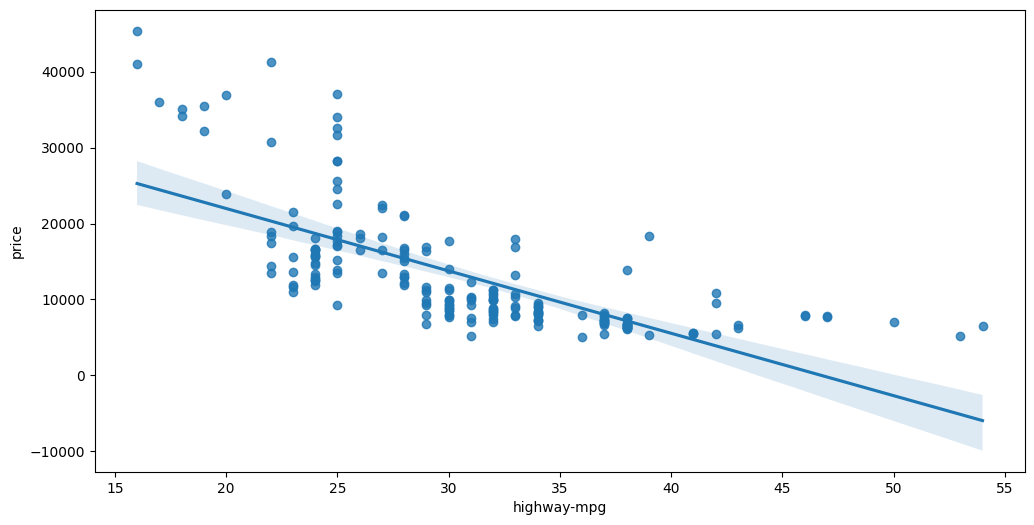

In [25]:
## Regression Plot

plt.figure(figsize=(12, 6))
sns.regplot(x= 'highway-mpg', y ='price', data=df_auto)
plt.show()

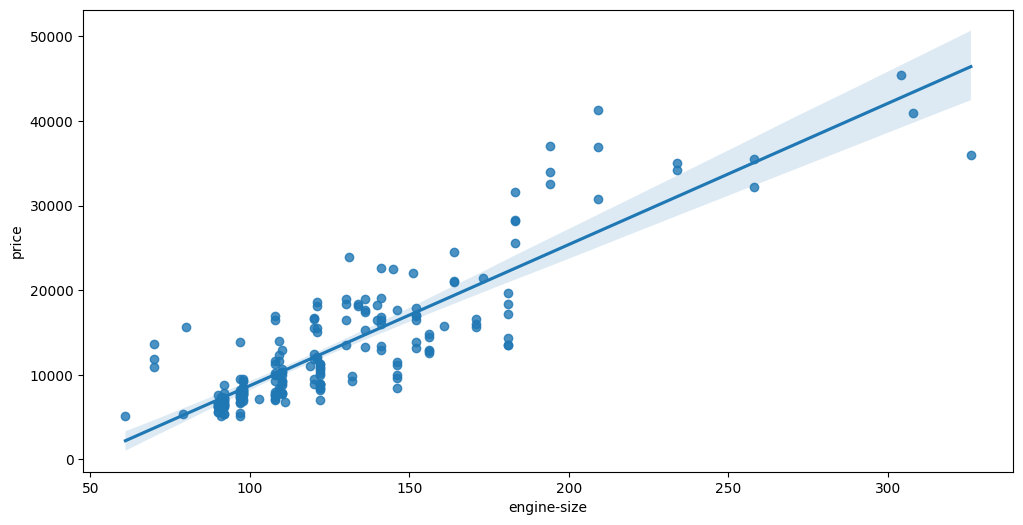

In [26]:
plt.figure(figsize=(12, 6))
sns.regplot(x= 'engine-size', y ='price', data=df_auto)
plt.show()

<ipython-input-27-2b8efe5589a1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test)


<Axes: xlabel='price', ylabel='Density'>

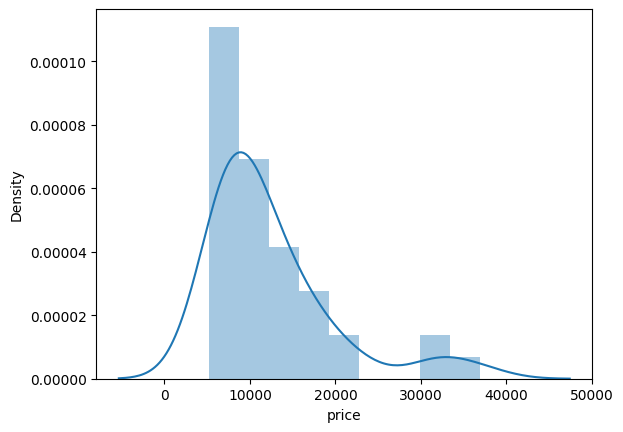

In [27]:
# Distribution Plot

sns.distplot(y_test)

<ipython-input-28-6af8e4e050e0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist =False, color = 'r', label= 'Actual Label')
<ipython-input-28-6af8e4e050e0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat_simple, hist=False, color='b', label='Fitted va

<Axes: xlabel='price', ylabel='Density'>

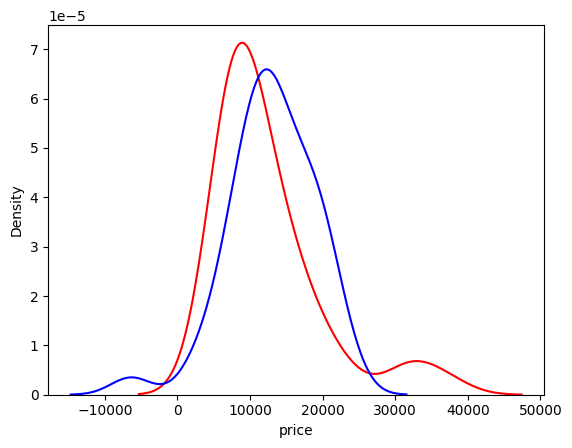

In [28]:
ax1 = sns.distplot(y_test, hist =False, color = 'r', label= 'Actual Label')
sns.distplot(y_hat_simple, hist=False, color='b', label='Fitted values', ax=ax1)


<ipython-input-29-b00f9f111048>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist =False, color = 'r', label= 'Actual Label')
<ipython-input-29-b00f9f111048>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat_mult, hist=False, color='b', label='Fitted valu

<Axes: xlabel='price', ylabel='Density'>

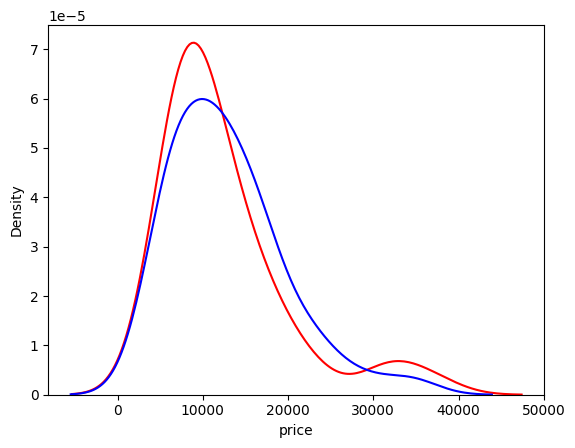

In [29]:
ax1 = sns.distplot(y_test, hist =False, color = 'r', label= 'Actual Label')
sns.distplot(y_hat_mult, hist=False, color='b', label='Fitted values', ax=ax1)

**Regression Metrics**

In [30]:
# simple linear regression

# sum(abs(y-y_pred))/n

mean_absolute_error(y_test, y_hat_simple)

4204.069931620724

In [31]:
mean_absolute_error(y_test, y_hat_mult)

2737.0634011548564

In [32]:
mean_squared_error(y_test, y_hat_simple)

29430822.338660154

In [33]:
mean_squared_error(y_test, y_hat_mult)

13623765.520788323

In [34]:
r2_score(y_test, y_hat_simple)

0.4446574660079585

In [35]:
r2_score(y_test, y_hat_mult)

0.7429274527307541